# Image Recognition - Inference
In this notebook, we load a trained model and run an inference on a test image.

In [3]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


In [5]:
import sys
sys.path.append('../core/')  # Add the core directory to the Python path
from simple_cnn import SimpleCNN

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Inference on {device}")

num_classes = 3

# Initialize the model
model = SimpleCNN(num_classes=num_classes)
model.to(device)  # Move model to device

# Load the model
model.load_state_dict(torch.load('../build/model.pth', map_location=device))
model.eval()


Inference on cuda:0


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=87616, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=3, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

## Processing the test image

In [6]:
# Define the same transform you used during training
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor()
])

# Load an image from test path
img_path = "../data/test/model a/test_image.png"  # Replace with your test image path
img = Image.open(img_path).convert('RGB')

# Apply the transformations to the image
input_img = transform(img).unsqueeze(0)  # Add a batch dimension


## Inference

In [8]:
# Move input data to device
input_img = input_img.to(device)

# Perform inference
with torch.no_grad():
    output = model(input_img)
    _, predicted = output.max(1)  # Get the index of the max log-probability


## Show Result

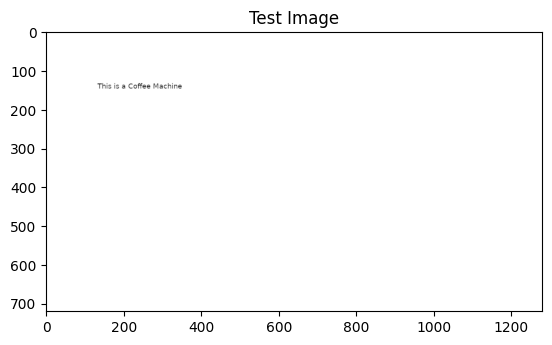

The model predicts that this image is: Model A


In [9]:
# Define a dictionary to map class indices to model names
class_idx_to_name = {
    0: 'Model A',
    1: 'Model B',
    2: 'Model C'
}

# Show the image
plt.imshow(img)
plt.title("Test Image")
plt.show()

# Show the prediction
print(f"The model predicts that this image is: {class_idx_to_name[predicted.item()]}")
